# Titanic: Machine Learning from Disaster

---

## Autor
### Gleisson Bispo

[<img src = https://pngimg.com/uploads/linkedIn/linkedIn_PNG27.png width=40 align="left">](https://www.linkedin.com/in/gleissonbispo/)

<img src = https://www.fundermax.at/fileadmin/redakteure/_processed_/2/0/csm_0085_268ce06b9f.jpg width=10 align="left">

[<img src = https://image.flaticon.com/icons/png/512/37/37318.png width=40 align="left">](https://github.com/gleissonbispo)

[<img src = https://storage.googleapis.com/kaggle-organizations/4/thumbnail.png width=45 align="left">](https://www.kaggle.com/gleissonbispo)

<img src = https://www.fundermax.at/fileadmin/redakteure/_processed_/2/0/csm_0085_268ce06b9f.jpg width=10>

<img src = https://www.fundermax.at/fileadmin/redakteure/_processed_/2/0/csm_0085_268ce06b9f.jpg width=10>



## Competition:
__[Kaggle Competition: Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)__

---

[<img src = https://assets.papelpop.com/wp-content/uploads/2017/12/titanic.jpg width=700>](https://www.kaggle.com/c/titanic/)

---

# Preparing Dataset

## Libraries

In [73]:
import pandas as pd
import numpy as np
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

## Train DataSet

In [74]:
df_train = pd.read_csv(r'data/train.csv')

In [75]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

## Data Info

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Numeric Info

In [77]:
df_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


## Missing Data

In [78]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() /
           df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


## Correlation

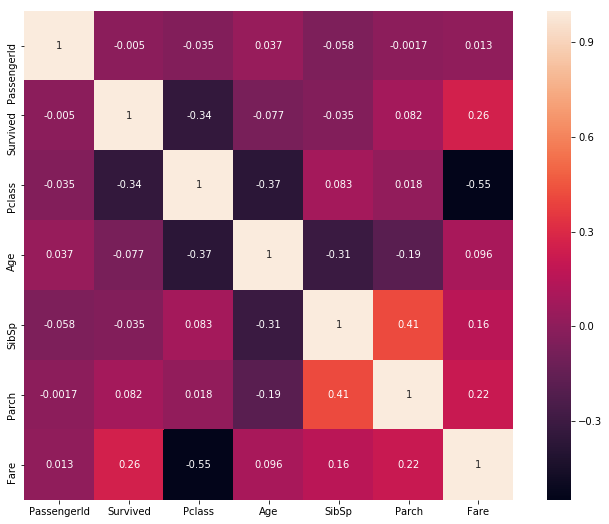

In [79]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,
            annot=True,
            square=True)

plt.show()

## Target Info

In [80]:
df_train['Survived'].value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## Plotting Features

### Suvived

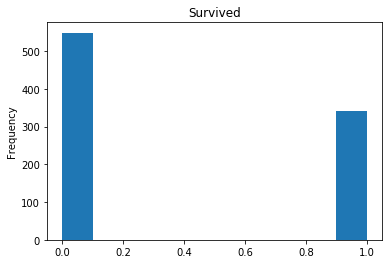

In [81]:
df_train['Survived'].plot(kind='hist', title='Survived')
plt.show()

### PClass

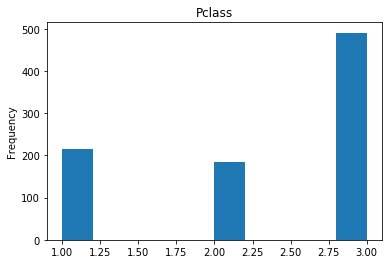

In [82]:
df_train['Pclass'].plot(kind='hist', title='Pclass')
plt.show()

### Age

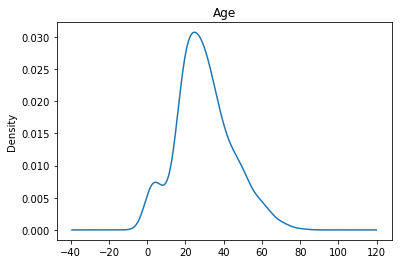

In [83]:
df_train['Age'].plot(kind='kde', title='Age')
plt.show()

### SibSp

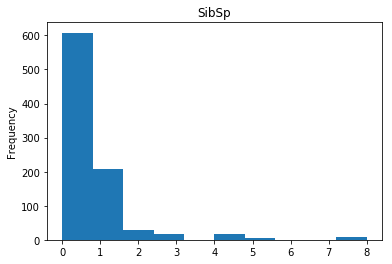

In [84]:
df_train['SibSp'].plot(kind='hist', title='SibSp')
plt.show()

### Parch

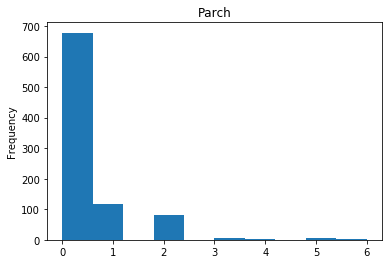

In [85]:
df_train['Parch'].plot(kind='hist', title='Parch')
plt.show()

### Fare

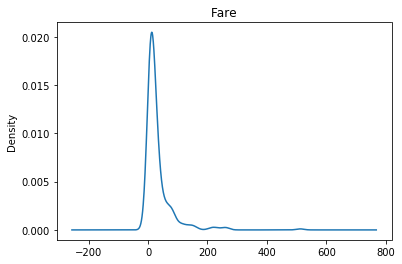

In [86]:
df_train['Fare'].plot(kind='kde', title='Fare')
plt.show()

# Featuring Engineering (Train)

## Cabin

In [87]:
df_train['Cabin'].value_counts(dropna=False).head()

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
Name: Cabin, dtype: int64

In [88]:
#Changing Cabin name by first letter
df_train['Cabin'] = df_train['Cabin'].str[:1].fillna('No_Cabin')

In [89]:
df_train['Cabin'].value_counts(dropna=False)

No_Cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: Cabin, dtype: int64

## Age

In [90]:
X_age = df_train[~(df_train['Age'].isnull())].drop(['Survived', 'PassengerId', 'Name', 'Age', 'Ticket'], axis=1)
y_age = df_train[~(df_train['Age'].isnull())]['Age']

In [91]:
X_age = pd.get_dummies(X_age, drop_first=True)

### Best Model

In [92]:
models = [
    xgb.XGBRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    LinearRegression()
]

for model_age in models:
    model_age.fit(X_age, y_age)
    y_pred_age = model_age.predict(X_age)
    name = model_age.__class__.__name__

    print("=" * 30)
    print(name)
    print('-----Train Data Results-----')
    print('MSE - Train', mean_squared_error(y_age, y_pred_age))
    print('MAE - Train', median_absolute_error(y_age, y_pred_age))
    print('R2 - Train', r2_score(y_age, y_pred_age))

XGBRegressor
-----Train Data Results-----
MSE - Train 111.87077072102701
MAE - Train 6.885632514953613
R2 - Train 0.4691112838354262
GradientBoostingRegressor
-----Train Data Results-----
MSE - Train 108.46779168246759
MAE - Train 6.815821778396521
R2 - Train 0.48526030257617403
RandomForestRegressor
-----Train Data Results-----
MSE - Train 68.08343826739682
MAE - Train 4.454603174603174
R2 - Train 0.6769064081628373
LinearRegression
-----Train Data Results-----
MSE - Train 157.10764275050482
MAE - Train 7.683282972297384
R2 - Train 0.25443729204789456


### Random Forest Model

In [93]:
X_age_null = df_train[(df_train['Age'].isnull())].drop(['Survived', 'PassengerId', 'Name', 'Age', 'Ticket'], axis=1)

In [94]:
X_age_null = pd.get_dummies(X_age_null, drop_first=True)

In [95]:
for x in list(X_age):
    if x not in list(X_age_null):
        X_age_null[x] = 0

In [96]:
model_age = RandomForestRegressor()
model_age.fit(X_age, y_age)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
y_pred_age_null = model_age.predict(X_age_null).round(2)

In [98]:
df_train.loc[df_train['Age'].isnull(), 'Age'] = y_pred_age_null

## Embarked

In [99]:
df_train['Embarked'].value_counts(dropna=False).head()

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [100]:
df_train['Embarked'].fillna('Not_Embarked', inplace=True)

## Transforming Data With log

### Fare

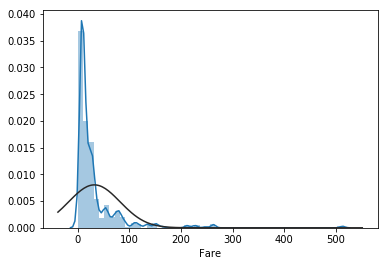

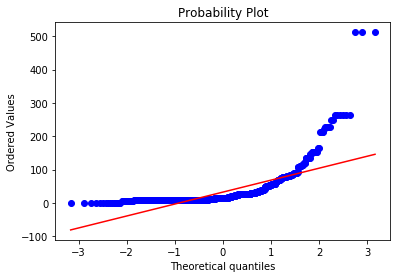

In [101]:
sns.distplot(df_train['Fare'], fit=st.norm);
fig = plt.figure()
res = st.probplot(df_train['Fare'], plot=plt)


In [102]:
df_train['Fare'] = np.log1p(df_train['Fare'])

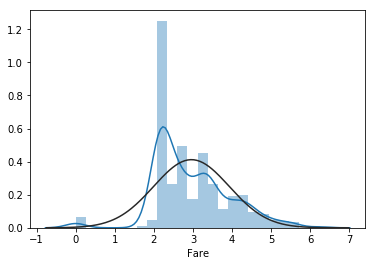

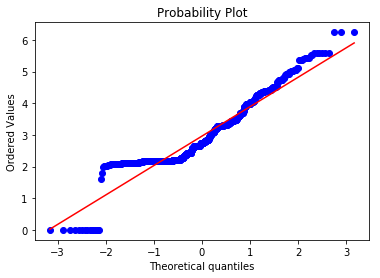

In [103]:
sns.distplot(df_train['Fare'], fit=st.norm);
fig = plt.figure()
res = st.probplot(df_train['Fare'], plot=plt)


## Last Name

In [104]:
df_train[['Last_Name', 'Name']] = df_train['Name'].str.split(',', expand=True)

## Standardizing Data

In [105]:
feat_list = list(df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
list_mean = []
list_std = []

for x in feat_list:
    list_mean.append(df_train[x].mean())
    list_std.append(df_train[x].std())

list_mean_std = pd.DataFrame({'feature':feat_list,
                              'mean': list_mean,
                              'std':list_std})
list_mean_std.head()

,feature,mean,std
0,Pclass,2.308642,0.836071
1,Age,29.399978,13.816101
2,SibSp,0.523008,1.102743
3,Parch,0.381594,0.806057
4,Fare,2.962246,0.969048


In [106]:
feat_list = list(df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

for i, x in enumerate(feat_list):
    df_train[x] = (df_train[x] - list_mean_std['mean'][i]) / list_mean_std['std'][i]

## Sppliting Data

In [107]:
X = pd.get_dummies(df_train.drop(['PassengerId', 'Name', 'Survived', 'Ticket'], axis=1), drop_first=True)
y = df_train['Survived']

## Balacing Data

In [108]:
sm = SMOTE(random_state=42)
X_2, y_2 = sm.fit_sample(X=X, y=y)

In [109]:
X_2 = pd.DataFrame(X_2, columns=list(X))
y_2 = pd.Series(y_2)

# Machine Learning

## Best Model - Without Balanced Data

In [110]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

for clf in classifiers:
    clf.fit(X, y)
    name = clf.__class__.__name__

    print("=" * 30)
    print(name)

    print('****Results****')
    y_pred = clf.predict(X)
    cv = cross_val_score(clf, X, y, cv=10, scoring='roc_auc').mean()
    print("Accuracy:", metrics.accuracy_score(y, y_pred))
    print("Precision:", metrics.precision_score(y, y_pred))
    print("Recall:", metrics.recall_score(y, y_pred))
    print("Roc Auc", cv)

KNeighborsClassifier
****Results****
Accuracy: 0.8956228956228957
Precision: 0.878419452887538
Recall: 0.8450292397660819
Roc Auc 0.8301202501202501
GaussianNB
****Results****
Accuracy: 0.9102132435465768
Precision: 0.8104265402843602
Recall: 1.0
Roc Auc 0.5596077016665252
LogisticRegression
****Results****
Accuracy: 0.8686868686868687
Precision: 0.8617363344051447
Recall: 0.783625730994152
Roc Auc 0.8713359646889058
SVC
****Results****
Accuracy: 0.7250280583613917
Precision: 0.7437185929648241
Recall: 0.4327485380116959
Roc Auc 0.816639589169001
DecisionTreeClassifier
****Results****
Accuracy: 0.9988776655443322
Precision: 1.0
Recall: 0.9970760233918129
Roc Auc 0.7992908072319838
RandomForestClassifier
****Results****
Accuracy: 0.978675645342312
Precision: 0.9938837920489296
Recall: 0.9502923976608187
Roc Auc 0.8552832951362364
GradientBoostingClassifier
****Results****
Accuracy: 0.8664421997755332
Precision: 0.8729096989966555
Recall: 0.7631578947368421
Roc Auc 0.8782024729083553


## Best Model - With Balanced Data

In [111]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

for clf in classifiers:
    clf.fit(X_2, y_2)
    name = clf.__class__.__name__

    print("=" * 30)
    print(name)

    print('****Results****')
    y_pred = clf.predict(X_2)
    cv = cross_val_score(clf, X_2, y_2, cv=10, scoring='roc_auc').mean()
    print("Accuracy:", metrics.accuracy_score(y_2, y_pred))
    print("Precision:", metrics.precision_score(y_2, y_pred))
    print("Recall:", metrics.recall_score(y_2, y_pred))
    print("Roc Auc", cv)

KNeighborsClassifier
****Results****
Accuracy: 0.8187613843351548
Precision: 0.7410468319559229
Recall: 0.9799635701275046
Roc Auc 0.7732250564001406
GaussianNB
****Results****
Accuracy: 0.9271402550091075
Precision: 0.8728139904610492
Recall: 1.0
Roc Auc 0.6040205081114172
LogisticRegression
****Results****
Accuracy: 0.8816029143897997
Precision: 0.8901303538175046
Recall: 0.8706739526411658
Roc Auc 0.9064799736988289
SVC
****Results****
Accuracy: 0.7404371584699454
Precision: 0.8
Recall: 0.6411657559198543
Roc Auc 0.8192109762042422
DecisionTreeClassifier
****Results****
Accuracy: 0.9990892531876139
Precision: 1.0
Recall: 0.9981785063752276
Roc Auc 0.8616498316498316
RandomForestClassifier
****Results****
Accuracy: 0.9890710382513661
Precision: 0.9926605504587156
Recall: 0.9854280510018215
Roc Auc 0.9283109660012017
GradientBoostingClassifier
****Results****
Accuracy: 0.8897996357012751
Precision: 0.891941391941392
Recall: 0.8870673952641166
Roc Auc 0.9141163316668368


## Fitting Best Models 

In [112]:
model_log = LogisticRegression()
model_rfo = RandomForestClassifier()
model_grd = GradientBoostingClassifier()
    
model_log.fit(X_2, y_2)
model_rfo.fit(X_2, y_2)
model_grd.fit(X_2, y_2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Ensemble Model

In [113]:
#create a dictionary of our models
estimators = [('log', model_log), ('rf', model_rfo), ('grd', model_grd)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

#fit model to training data
ensemble.fit(X_2, y_2)

#test our model on a cross validation
cv = cross_val_score(ensemble, X_2, y_2, cv=10, scoring='roc_auc').mean()
print('Roc Auc', cv)

Roc Auc 0.932180435102994


# Test Dataset

## Preparing Dataset

In [114]:
df_test = pd.read_csv(r'data/test.csv')

In [115]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

### Data Info

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Numeric Info

In [117]:
df_test.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.50,120.81,892.00,996.25,1100.50,1204.75,1309.00
Pclass,418.0,2.27,0.84,1.00,1.00,3.00,3.00,3.00
Age,332.0,30.27,14.18,0.17,21.00,27.00,39.00,76.00
SibSp,418.0,0.45,0.90,0.00,0.00,0.00,1.00,8.00
Parch,418.0,0.39,0.98,0.00,0.00,0.00,0.00,9.00
Fare,417.0,35.63,55.91,0.00,7.90,14.45,31.50,512.33


### Missing Data

In [118]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum() /
           df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


## Featuring Engineering

### Cabin

In [119]:
df_test['Cabin'].value_counts(dropna=False).head()

NaN                327
B57 B59 B63 B66      3
C55 C57              2
C31                  2
C78                  2
Name: Cabin, dtype: int64

In [120]:
#Changing Cabin name by first letter
df_test['Cabin'] = df_test['Cabin'].str[:1].fillna('No_Cabin')

In [121]:
df_test['Cabin'].value_counts(dropna=False).head()

No_Cabin    327
C            35
B            18
D            13
E             9
Name: Cabin, dtype: int64

### Age

In [122]:
X_age_null_test = df_test[(df_test['Age'].isnull())].drop(
    ['PassengerId', 'Name', 'Age', 'Ticket'], axis=1)

In [123]:
X_age_null_test = pd.get_dummies(X_age_null_test, drop_first=True)

In [124]:
for x in list(X_age):
    if x not in list(X_age_null_test):
        X_age_null_test[x] = 0

In [125]:
y_pred_age_null_teset = model_age.predict(X_age_null_test).round(2)

In [126]:
df_test.loc[df_test['Age'].isnull(), 'Age'] = y_pred_age_null_teset

### Fare

In [127]:
df_test['Fare'].fillna(0, inplace=True)

### Transforming Data with log

In [128]:
df_test['Fare'] = np.log1p(df_test['Fare'])

### Last Name

In [129]:
df_test[['Last_Name', 'Name']] = df_test['Name'].str.split(',', expand=True)

### Standardizing Data

In [130]:
feat_list = list(df_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

for i, x in enumerate(feat_list):
    df_test[x] = (df_test[x] - list_mean_std['mean'][i]) / list_mean_std['std'][i]

## Sppliting Data

In [131]:
X_test = pd.get_dummies(df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1), drop_first=True)

# Predicting

In [132]:
for x in list(X_2):
    if x not in list(X_test):
        X_test[x] = 0

In [133]:
y_pred_test = ensemble.predict_proba(X_test[list(X_2)])[:,1]

In [134]:
df_test['Survived_2'] = y_pred_test

## Plotting Survived Target

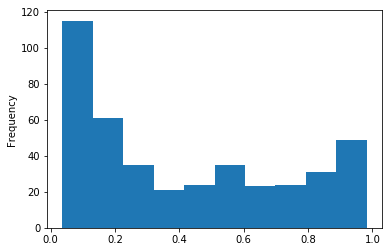

In [135]:
df_test['Survived_2'].plot(kind='hist')

## Creating the trashrold

In [136]:
df_test['Survived'] = 0

In [137]:
df_test.loc[df_test['Survived_2'] > .57, 'Survived'] = 1

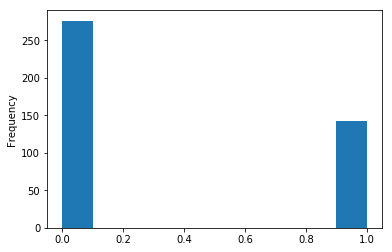

In [138]:
df_test['Survived'].plot(kind='hist', range=(0, 1))

In [139]:
df_test['Survived'].value_counts(1)

0    0.660287
1    0.339713
Name: Survived, dtype: float64

# Submission File

In [140]:
df_test_final = df_test[['PassengerId', 'Survived']]

In [141]:
df_test_final.to_csv('data/Titanic_Submission.csv', index=False)
print('File Created Successfully')

File Created Successfully


# Results

## Kaggle Score
<img src = https://raw.githubusercontent.com/gleissonbispo/Kaggle-Competitions/master/Titanic/data/Leaderboard_Kaggle.PNG>

## Kaggle Leaderboard
<img src = https://raw.githubusercontent.com/gleissonbispo/Kaggle-Competitions/master/Titanic/data/Result_Kaggle.PNG>